In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm

mpl.rcParams['font.family'] = 'Arial'

In [79]:
path = "01896 CA 5nn 0.45x3 10.csv"
path = path + '.csv'
name = path[:5]
# paste the path here (cluster analysis result)

In [80]:
df = pd.read_csv(path, skiprows = 10) #跳過前十行的參數部分
col = ['Ranged Ions' , 'Al % Ranged', 'Mg % Ranged', 'Zn % Ranged', 'Cu % Ranged']

#分離cluster與 matrix
matrix = df[:1]
clusters = df[1:]

x = clusters[col].values.transpose()
Atoms = clusters['Ranged Ions']  #各cluster的atom數

#將所有cluster依照cluster atom數量由小到大排列
sorted_indexes = np.argsort(x[0])
sorted_x = x[:, sorted_indexes]

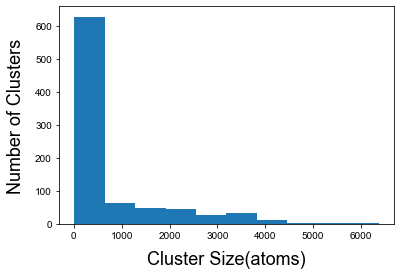

In [49]:
#一般的 histogram

plt.hist(Atoms, bins = 10)
plt.xlabel('Cluster Size(atoms)', fontsize = 18, labelpad = 10)
plt.ylabel('Number of Clusters', fontsize = 18, labelpad = 10)

plt.savefig( 'output/' + name + '_ROIhist.png', facecolor = 'white', bbox_inches = 'tight') 

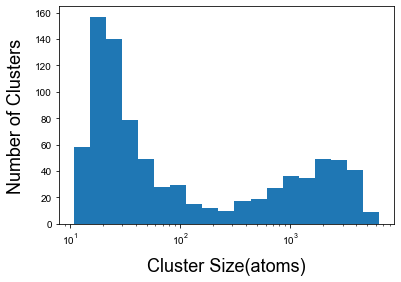

In [50]:
bins = np.logspace(np.log10(min(Atoms)), np.log10(max(Atoms)), 20) # logscale 之 histogram 

plt.hist(Atoms, bins = bins) #useful for mpl.rcParams['font.family'] = 'Arial'distribution
mpl.rcParams['font.family'] = 'Arial'
plt.xlabel('Cluster Size(atoms)', fontsize = 18, labelpad = 10)
plt.xscale('log')
plt.ylabel('Number of Clusters', fontsize = 18, labelpad = 10)

plt.savefig( 'output/'+ name +'_loghist.png', facecolor = 'white', bbox_inches = 'tight') 

In [81]:
max_digit = int(np.log10(sorted_x[0][len(sorted_x[0])-1]))
binned_x = []
for i in range(max_digit):
    j = i + 1
    maski = (sorted_x[0] > 10**j) & (sorted_x[0] <= 10**(j+1))
    binned_x.append(sorted_x[:, maski])

In [82]:
#不要10000+的類別
if max_digit == 4:
    binned_x[2] = np.append(binned_x[2], binned_x[3],axis = 1)
    max_digit = 3

In [83]:
if max_digit == 3: 
    plotx = ['10-100', '101-1000', '>1000']
elif max_digit > 3: 
    plotx = ['10-100', '101-1000', '1001-10000','>10000']
    binned_x[3] = np.append(binned_x[3], binned_x[4],axis = 1)
    max_digit = 4
else: plotx = [0]

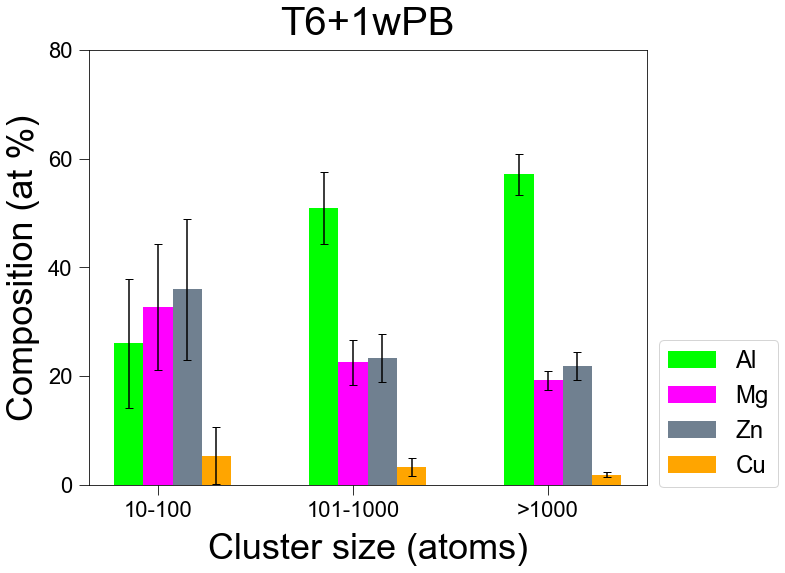

In [84]:
#並列式的bar chart

width = 0.15 #bar width

y_Al = [np.mean(binned_x[i][1]) for i in range(max_digit)]
y_Mg = [np.mean(binned_x[i][2]) for i in range(max_digit)]
y_Zn = [np.mean(binned_x[i][3]) for i in range(max_digit)]
y_Cu = [np.mean(binned_x[i][4]) for i in range(max_digit)]

#每種ion有不同對應x座標
br1 = np.arange(max_digit)
br2 = [width + x for x in br1]
br3 = [width + x for x in br2]
br4 = [width + x for x in br3]

plt.figure(figsize = (10,8))
plt.bar(br1, y_Al,  width = width, label = 'Al', color = 'lime', yerr = [np.std(binned_x[i][1]) for i in range(max_digit)], capsize = 4)
plt.bar(br2, y_Mg,  width = width, label = 'Mg', color = 'fuchsia', yerr = [np.std(binned_x[i][2]) for i in range(max_digit)], capsize = 4)
plt.bar(br3, y_Zn,  width = width, label = 'Zn', color = 'slategrey', yerr = [np.std(binned_x[i][3]) for i in range(max_digit)], capsize = 4)
plt.bar(br4, y_Cu,  width = width, label = 'Cu' , color = 'orange', yerr = [np.std(binned_x[i][4]) for i in range(max_digit)], capsize = 4)
plt.title('T6+1wPB', fontsize = 40, pad = 15)  #\u00B0C是度C
plt.xlabel('Cluster size (atoms)', fontsize = 36, labelpad = 12)
plt.xticks([r+ width for r in range(max_digit)], plotx, fontsize = 22)
plt.ylabel('Composition (at %)', fontsize = 36, labelpad = 8)
plt.yticks(np.arange(0,81,20),fontsize = 22)
plt.ylim(0,80)

plt.tick_params(length = 10, pad = 6)
plt.legend(bbox_to_anchor=(1, 0.36),  fontsize = 24)
plt.savefig( 'output/' + name + '_bar.png', facecolor = 'white', bbox_inches='tight')

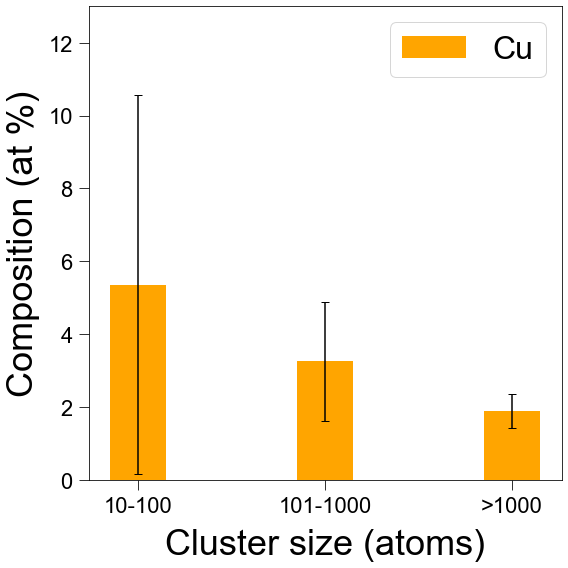

In [85]:
# Cu bar chart
plt.figure(figsize = (8,8))
plt.bar(br1, y_Cu,  width = 0.3, label = 'Cu', color = 'orange', yerr = [np.std(binned_x[i][4]) for i in range(max_digit)], capsize = 4)
plt.xticks([r for r in range(max_digit)], plotx,  fontsize = 22)
plt.xlabel('Cluster size (atoms)', fontsize = 36, labelpad = 12)
plt.ylabel('Composition (at %)', fontsize = 36, labelpad = 8)
plt.yticks(fontsize = 22)
plt.ylim(0,13)
plt.tick_params(length = 10, pad = 6)
plt.legend(bbox_to_anchor=(1, 1),  fontsize = 32)
plt.tight_layout()

plt.savefig( 'output/' + name + '_Cu_bar.png', facecolor = 'white', bbox_inches='tight')

In [86]:
for i in range(max_digit):
    Cu_ratio = (np.sum(binned_x[i][4] * binned_x[i][0]) / np.sum(binned_x[i][0])) 
    print(f"Category {plotx[i]} has Cu content {Cu_ratio:.2f}%" )

Category 10-100 has Cu content 5.18%
Category 101-1000 has Cu content 2.95%
Category >1000 has Cu content 1.77%


In [87]:
for i in range(max_digit):
    print(f"Category {plotx[i]} has {len(binned_x[i][0])} clusters and {np.sum(binned_x[i][0]):.0f} atoms in total")

Category 10-100 has 531 clusters and 15224 atoms in total
Category 101-1000 has 127 clusters and 59138 atoms in total
Category >1000 has 346 clusters and 1172052 atoms in total


In [15]:
np.sum(binned_x[0][4]/100 * binned_x[0][0])

788.0

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,8))
ax2 = ax1.twinx()

#堆疊圖(表示各成分的占比)
ax1.set_ylabel('Cluster Composition (at %)', fontsize = 28, labelpad = 10)
ax1.stackplot(np.arange(0, len(clusters)), sorted_x[1], sorted_x[2], sorted_x[3], sorted_x[4], labels = ['Al', 'Mg', 'Zn', 'Cu'], colors = ['lime', 'fuchsia', 'slategrey', 'orange'])
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.35), fontsize = 22) #把legend放到外面
ax1.set_ylim(0,100)
ax1.tick_params(axis='y', labelsize=16, length = 8) #調整大小

ax1.tick_params(axis = 'x', labelsize = 16, length = 8 )
ax1.set_xlabel('Cluster sequence (in ascending # of atoms)', fontsize = 28, labelpad = 15)
ax1.set_xlim(0, len(clusters)-1 )

#折線圖(表示cluster的atom數量)
ax2.plot(np.arange(0, len(clusters)), sorted_x[0].astype('int'), 'ko', markersize = 1)
ax2.set_ylabel('Cluster Size (atoms)', fontsize = 28, labelpad = 15) #labelpad是間距
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=20, length = 8) #調整大小

#輸出到 output 資料夾
plt.savefig( 'output/' + name + '_stackplot.png', facecolor = 'white', bbox_inches='tight')

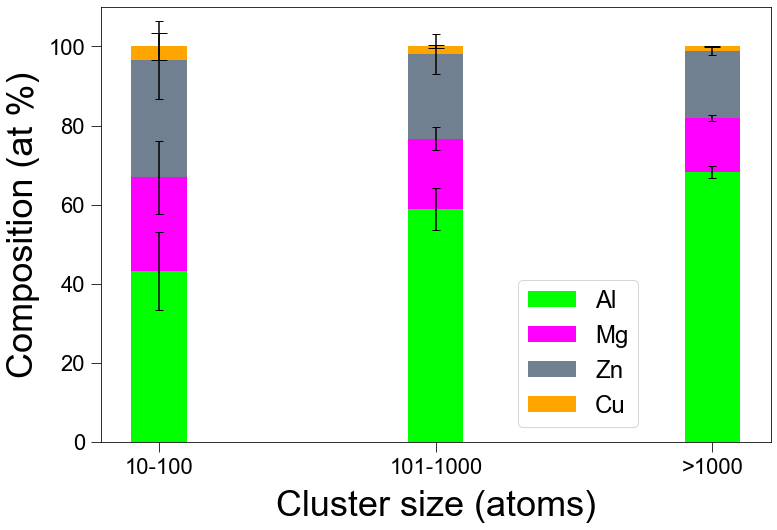

In [90]:
#疊加式的 bar chart

#plotx = np.array([(10**(i+1)) for i in range(max_digit)])
width = 0.2

y_Al = [np.mean(binned_x[i][1]) for i in range(max_digit)]
y_Mg = [np.mean(binned_x[i][2]) for i in range(max_digit)]
y_Zn = [np.mean(binned_x[i][3]) for i in range(max_digit)]
y_Cu = [np.mean(binned_x[i][4]) for i in range(max_digit)]

plt.figure(figsize = (12,8))
plt.bar(plotx, y_Al,  width = width, label = 'Al', color = 'lime', yerr = [np.std(binned_x[i][1]) for i in range(max_digit)], capsize = 4)
plt.bar(plotx, y_Mg,  width = width, bottom = y_Al, label = 'Mg', color = 'fuchsia', yerr = [np.std(binned_x[i][2]) for i in range(max_digit)], capsize = 4)
plt.bar(plotx, y_Zn,  width = width, bottom = [y_Al[i]+y_Mg[i] for i in range(max_digit)] , label = 'Zn', color = 'slategrey', yerr = [np.std(binned_x[i][3]) for i in range(max_digit)], capsize = 4)
plt.bar(plotx, y_Cu,  width = width, bottom = [y_Al[i]+y_Mg[i]+y_Zn[i] for i in range(max_digit)], label = 'Cu' , color = 'orange', yerr = [np.std(binned_x[i][4]) for i in range(max_digit)], capsize = 8)
#plt.xscale('log')
plt.xlabel('Cluster size (atoms)', fontsize = 36, labelpad = 12)
plt.xticks(fontsize = 22)
plt.ylabel('Composition (at %)', fontsize = 36, labelpad = 8)
plt.yticks(fontsize = 22)
plt.ylim(0,110)

plt.tick_params(length = 10, pad = 6)
plt.legend(bbox_to_anchor=(0.82, 0.4),  fontsize = 24)
plt.savefig( 'output/' + name + '_stackbar.png', facecolor = 'white', bbox_inches='tight')